In [1]:
import pandas as pd

In [2]:
dataTweet = pd.read_csv("helmi.csv", usecols=["text","sentiment"], encoding = "latin-1")

In [3]:
dataTweet

,text,sentiment
0,b'@kompascom Permintaan khusus dari @Telkomse...,positive
1,Streaming YouTube di hp paling bagus pake Telk...,positive
2,"b'@Telkomsel Alhamdulillah Kak, sudah 3 x 24 j...",positive
3,b'@Telkomsel lucu lihat satu keluarga teman be...,positive
4,@Telkomsel memang cepat sinyalnya 4G,positive
...,...,...
7341,b'@Telkomsel rugi isi pulsa 200. untuk dafta...,negative
7342,b'@Telkomsel Tapi yang adanya di pilihan hanya...,negative
7343,b'@Telkomsel mohonmasih awal tahun malas kompl...,negative
7344,b'@Telkomsel Banyak min. Keluhannya? Pakat kuo...,negative


In [4]:
dataTweet.columns = ["text","sentiment"]
print(dataTweet .columns)

Index(['text', 'sentiment'], dtype='object')


In [5]:
dataTweet.shape

(7346, 2)

In [6]:
dataTweet.describe()

,text,sentiment
count,7346,7346
unique,7345,2
top,b'@Telkomsel Oke terima kasih infonya',negative
freq,2,4228


In [7]:
dataTweet['sentiment'].value_counts()

negative    4228
positive    3118
Name: sentiment, dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


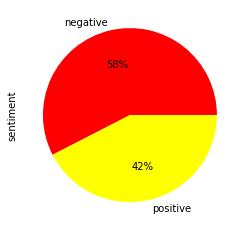

In [9]:
dataTweet.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow"])

# Preprocessing | Case Folding

In [10]:
def casefolding(text):
    text = text.lower().strip()
    return text 

hasilcasefolding = []
for text in dataTweet.text:
    pro = casefolding(text)
    hasilcasefolding.append(pro)
    
dataTweet['text'] = hasilcasefolding
dataTweet.to_csv('hasilcasefolding.csv')
dataTweet.head(10)

,text,sentiment
0,b'@kompascom permintaan khusus dari @telkomse...,positive
1,streaming youtube di hp paling bagus pake telk...,positive
2,"b'@telkomsel alhamdulillah kak, sudah 3 x 24 j...",positive
3,b'@telkomsel lucu lihat satu keluarga teman be...,positive
4,@telkomsel memang cepat sinyalnya 4g,positive
5,b'@telkomsel ketika kakak merepson dengan baik...,positive
6,b'selamat pagi min @telkomsel mohon cek dm say...,positive
7,b'@syaifulan27 @telkomsel ada kuota murah deka...,positive
8,teman aku pakai @telkomsel di kosannya sinyal...,positive
9,b'@irwancihuy @sobathape @telkomsel tetap tena...,positive


In [11]:
dataTweet = pd.read_csv("hasilcasefolding.csv", encoding = "latin-1", usecols=["text","sentiment"])

In [12]:
import re
import string

# Preprocessing | Noise Removal

In [13]:
def clean(text):
    text = re.sub(r'\n', '', text)
    #Menghapus username 
    text = re.sub("(@[A-Za-z0-9]+)","",text)
    #Menghapus #
    text = re.sub("(#[A-Za-z0-9]+)","",text)

    text = re.sub("(\w+:\/\/\S+)","",text)
    #Menghapus link
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', '', text)

    #Menghapus sebuah kalimat bersama angka dalam satu kata
    text = re.sub("(\w*\d\w*)","",text)

    # menghapus simbol
    text = re.sub(r'[^A-Za-z\s\/]' ,' ', text)

    text = re.sub(r'_', '', text) #hapus simbol _

    # menghapus angka
    text = re.sub(r'\d+', '', text)
    
    # menghapus spasi
    text = re.sub(r'\s{2,}', ' ', text)

    #menghapus b diawal kalimat tweet
    text = text.replace('b ','')
    return text
  
hasilclean = []
for desc in dataTweet.text:
    pro = clean(desc)
    hasilclean.append(pro)
    
dataTweet['text'] = hasilclean

dataTweet.to_csv('hasilcleaning.csv')
dataTweet.rename(columns={"text": "Hasil Cleaning"}).head(10)

,Hasil Cleaning,sentiment
0,permintaan khusus dari sudah saya laksanakan,positive
1,streaming youtube di hp paling bagus pake telk...,positive
2,alhamdulillah kak sudah x jam sejak pelaporan ...,positive
3,lucu lihat satu keluarga teman begitu harmonis...,positive
4,memang cepat sinyalnya,positive
5,ketika kakak merepson dengan baik semoga telko...,positive
6,selamat pagi min mohon cek dm saya terima kasi...,positive
7,ada kuota murah dekat pasar paling dekat tanah...,positive
8,teman aku pakai di kosannya sinyalnya kencang,positive
9,tetap tenang meskipun ada badai sesekali di uj...,positive


In [14]:
dataTweet = pd.read_csv("hasilcleaning.csv", encoding = "latin-1", usecols=["text","sentiment"])

In [15]:
from tqdm import tqdm_notebook as tqdm

In [16]:
def tokenizer(text):
    return text.split()

hasiltokenizer = []
for desc in tqdm(dataTweet['text']):
    pro = tokenizer(desc)
    hasiltokenizer.append(pro)
    
dataTweet['text'] = hasiltokenizer

dataTweet.to_csv('hasiltokonizer.csv')
dataTweet.head(10)

,text,sentiment
0,"[permintaan, khusus, dari, sudah, saya, laksan...",positive
1,"[streaming, youtube, di, hp, paling, bagus, pa...",positive
2,"[alhamdulillah, kak, sudah, x, jam, sejak, pel...",positive
3,"[lucu, lihat, satu, keluarga, teman, begitu, h...",positive
4,"[memang, cepat, sinyalnya]",positive
5,"[ketika, kakak, merepson, dengan, baik, semoga...",positive
6,"[selamat, pagi, min, mohon, cek, dm, saya, ter...",positive
7,"[ada, kuota, murah, dekat, pasar, paling, deka...",positive
8,"[teman, aku, pakai, di, kosannya, sinyalnya, k...",positive
9,"[tetap, tenang, meskipun, ada, badai, sesekali...",positive


In [17]:
dataTweet

,text,sentiment
0,"[permintaan, khusus, dari, sudah, saya, laksan...",positive
1,"[streaming, youtube, di, hp, paling, bagus, pa...",positive
2,"[alhamdulillah, kak, sudah, x, jam, sejak, pel...",positive
3,"[lucu, lihat, satu, keluarga, teman, begitu, h...",positive
4,"[memang, cepat, sinyalnya]",positive
...,...,...
7341,"[rugi, isi, pulsa, untuk, daftar, paket, hanya...",negative
7342,"[tapi, yang, adanya, di, pilihan, hanya, paket...",negative
7343,"[mohonmasih, awal, tahun, malas, komplain, ter...",negative
7344,"[banyak, min, keluhannya, pakat, kuota, dibagi...",negative


# Preprocessing stopword removal

In [18]:
def hapus_stopword(desc):
    StopWords = "stpword.txt"
    sw=open(StopWords,encoding='utf-8', mode='r');stop=sw.readlines();sw.close()
    stop=[kata.strip() for kata in stop];stop=set(stop)
    kata = [item for item in desc if item not in stop]
    return ' '.join(kata)

hasilstopword = []

for desc in tqdm(dataTweet['text']):
    pro = hapus_stopword(desc)
    hasilstopword.append(pro)
    
dataTweet['text'] = hasilstopword

dataTweet.to_csv('hasilstopwordfile.csv')
dataTweet.head(10)

,text,sentiment
0,permintaan khusus sudah laksanakan,positive
1,streaming youtube hp bagus pake telkomsel gaad...,positive
2,alhamdulillah kak sudah x jam pelaporan balasa...,positive
3,lucu lihat keluarga teman harmonis kompak pakai,positive
4,cepat sinyalnya,positive
5,kakak merepson baik semoga telkomsel menidakla...,positive
6,selamat pagi min mohon cek dm terima kasih per...,positive
7,kuota murah pasar tanah abang,positive
8,teman pakai kosannya sinyalnya kencang,positive
9,tenang badai uji kuat,positive


In [19]:
dataTweet

,text,sentiment
0,permintaan khusus sudah laksanakan,positive
1,streaming youtube hp bagus pake telkomsel gaad...,positive
2,alhamdulillah kak sudah x jam pelaporan balasa...,positive
3,lucu lihat keluarga teman harmonis kompak pakai,positive
4,cepat sinyalnya,positive
...,...,...
7341,rugi isi pulsa daftar paket dipakai seminggu,negative
7342,tapi pilihan paket omg paket intrnet tidak ter...,negative
7343,mohonmasih malas komplain jaringan tidak perna...,negative
7344,min keluhannya pakat kuota dibagi tidak,negative


In [20]:
dataTweet = dataTweet[dataTweet['text'].notnull()]

In [21]:
dataTweet

,text,sentiment
0,permintaan khusus sudah laksanakan,positive
1,streaming youtube hp bagus pake telkomsel gaad...,positive
2,alhamdulillah kak sudah x jam pelaporan balasa...,positive
3,lucu lihat keluarga teman harmonis kompak pakai,positive
4,cepat sinyalnya,positive
...,...,...
7341,rugi isi pulsa daftar paket dipakai seminggu,negative
7342,tapi pilihan paket omg paket intrnet tidak ter...,negative
7343,mohonmasih malas komplain jaringan tidak perna...,negative
7344,min keluhannya pakat kuota dibagi tidak,negative


In [22]:
dataTweet['sentiment'] = dataTweet['sentiment'].map({'positive' :1, 'negative' : 0})
dataTweet.sample(3)

,text,sentiment
3638,halo kenapa tidak bisa membeli paket omg bisa ...,0
4360,kenapa tidak bisa browsing,0
3807,ganti coba je jg indihome lambat,0


In [23]:
from gensim.models.word2vec import Word2Vec

In [26]:
id_w2v = Word2Vec.load("../Word2vec/idwiki_word2vec_100.model")

In [27]:
test_word = "lambat"
print('Top 5 words similar to', test_word)
id_w2v.wv.most_similar(test_word, topn = 5)

Top 5 words similar to lambat


[('lamban', 0.7695572376251221),
 ('cepat', 0.7621601819992065),
 ('kencang', 0.6174722909927368),
 ('efisien', 0.6161587238311768),
 ('sedikit', 0.6125926971435547)]

In [28]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [29]:
texts=dataTweet.text
tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(texts)
sequences_train = tokenizer.texts_to_sequences(dataTweet.text)

In [30]:
len(sequences_train)

7346

In [31]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 5993 unique tokens.


In [32]:
word_index

{'tidak': 1,
 'telkomsel': 2,
 'bisa': 3,
 'sudah': 4,
 'pulsa': 5,
 'min': 6,
 'kenapa': 7,
 'sinyal': 8,
 'paket': 9,
 'kasih': 10,
 'kuota': 11,
 'internet': 12,
 'terima': 13,
 'lambat': 14,
 'jaringan': 15,
 'masuk': 16,
 'ya': 17,
 'tapi': 18,
 'tolong': 19,
 'nya': 20,
 'belum': 21,
 'pakai': 22,
 'lama': 23,
 'banget': 24,
 'xad': 25,
 'jelek': 26,
 'mahal': 27,
 'jangan': 28,
 'beli': 29,
 'baik': 30,
 'hari': 31,
 'gangguan': 32,
 'isi': 33,
 'provider': 34,
 'lancar': 35,
 'bagus': 36,
 'padahal': 37,
 'poin': 38,
 'hilang': 39,
 'netflix': 40,
 'bermasalah': 41,
 'cepat': 42,
 'semoga': 43,
 'dm': 44,
 'halo': 45,
 'kemarin': 46,
 'mohon': 47,
 'admin': 48,
 'oke': 49,
 'sinyalnya': 50,
 'sms': 51,
 'daerah': 52,
 'susah': 53,
 'malam': 54,
 'nomor': 55,
 'pelanggan': 56,
 'layanan': 57,
 'cek': 58,
 'jam': 59,
 'parah': 60,
 'harus': 61,
 'aplikasi': 62,
 'data': 63,
 'kartu': 64,
 'mati': 65,
 'ganti': 66,
 'kak': 67,
 'masa': 68,
 'mytelkomsel': 69,
 'stabil': 70,
 'grat

In [33]:
vocab_size = len(word_index)+1   

embedding_matrix = np.zeros((vocab_size, 100))

for word, i in word_index.items():
    if word in id_w2v.wv:
        embedding_matrix[i] = id_w2v.wv[word]  

print('Shape of embedding matrix :', embedding_matrix.shape)

Shape of embedding matrix : (5994, 100)


In [34]:
embedding_matrix.shape

(5994, 100)

In [35]:
Bigger_list = []
for i in dataTweet['text']:
    li = list(i.split(" "))
    Bigger_list.append(li)

In [36]:
def text_to_int(df, word_index, max_len):

    X = np.zeros((df.shape[0], max_len))  #initialising the nd-array
    
    for i, tweet in enumerate(df.text):
        words = list(tweet.split(" "))
        j = 0
        for word in reversed(words):
            if word in word_index.keys():   #if present in our vocab
                X[i, max_len-1-j] = word_index[word]
                j += 1
    return X

#finding the longest tweet
max_len = 0
for list_ in Bigger_list:
    if len(list_)>max_len:
        max_len = len(list_)

print('Length of longest tweet is',max_len)

#converting train_data tweets to integer
X = text_to_int(dataTweet, word_index, max_len)

Length of longest tweet is 32


In [37]:
X.shape

(7346, 32)

In [38]:
print(dataTweet.text[100], '\n mapped to \n', X[100])

al selamat hadiah promo telkomsel berbagi tips 
 mapped to 
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.790e+03 1.460e+02 1.830e+02
 8.400e+01 2.000e+00 4.070e+02 1.997e+03]


In [39]:
Y = dataTweet["sentiment"]

In [40]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
7341    0
7342    0
7343    0
7344    0
7345    0
Name: sentiment, Length: 7346, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.2)

In [43]:
from keras.layers import Embedding
from keras.optimizers import Adam
from keras import regularizers
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Input
from keras.layers import Activation
from sklearn.model_selection import StratifiedKFold, KFold

In [44]:
MAX_SEQUENCE_LENGTH = X_train.shape[1]
EMBEDDING_DIM = 100

In [45]:
embedding_layer = Embedding(len(word_index)+1, EMBEDDING_DIM, weights=[embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable=False)

In [46]:
X_train

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 8.380e+02, 5.028e+03,
        1.010e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.010e+02, 8.620e+02,
        1.840e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.943e+03, 2.362e+03,
        8.630e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.989e+03,
        6.310e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.200e+01, 7.900e+02,
        1.100e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.500e+01, 5.320e+02,
        1.770e+02]])

In [47]:
X_train = np.array(X_train)

In [48]:
X_train

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 8.380e+02, 5.028e+03,
        1.010e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.010e+02, 8.620e+02,
        1.840e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.943e+03, 2.362e+03,
        8.630e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.989e+03,
        6.310e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.200e+01, 7.900e+02,
        1.100e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.500e+01, 5.320e+02,
        1.770e+02]])

In [49]:
y_train

5474    0
317     1
2567    1
5511    0
313     1
       ..
4662    0
1247    1
74      1
529     1
4559    0
Name: sentiment, Length: 5876, dtype: int64

In [50]:
y_train = np.array(y_train)

In [51]:
y_train

array([0, 1, 1, ..., 1, 1, 0])

In [52]:
y_test = np.array(y_test)

In [53]:
y_test[0]

0

In [54]:
from keras.optimizers import Nadam
kfold = KFold(n_splits= 10, random_state=None, shuffle=True)
cvscores = []
for train, test in kfold.split(X_train,y_train):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding= embedding_layer(sequence_input)
    model_lstm = LSTM(2)(embedding)
    dropout = Dropout(0.3)(model_lstm)
    preds = (Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))(dropout)
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    print(model.summary())
    history = model.fit(X_train[train], y_train[train], batch_size=128, epochs=50, validation_data=(X_train[test], y_train[test]), verbose=2)
    score= model.evaluate(X_train[test], y_train[test], verbose=2)
    print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
    cvscores.append(score[1]*100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 32, 100)           599400    
_________________________________________________________________
lstm_1 (LSTM)                (None, 2)                 824       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 600,227
Trainable params: 827
Non-trainable params: 599,400
_________________________________________________________________
None
Train on 5288 samples, validate on 588 samples
Epoch 1/50
 - 1s - loss: 0.7346 - accuracy: 0.5210 - val_loss: 0.

Epoch 16/50
 - 1s - loss: 0.3076 - accuracy: 0.9045 - val_loss: 0.2640 - val_accuracy: 0.9405
Epoch 17/50
 - 0s - loss: 0.3047 - accuracy: 0.9104 - val_loss: 0.2626 - val_accuracy: 0.9439
Epoch 18/50
 - 1s - loss: 0.3000 - accuracy: 0.9111 - val_loss: 0.2542 - val_accuracy: 0.9422
Epoch 19/50
 - 0s - loss: 0.3014 - accuracy: 0.9064 - val_loss: 0.2510 - val_accuracy: 0.9456
Epoch 20/50
 - 0s - loss: 0.2948 - accuracy: 0.9098 - val_loss: 0.2480 - val_accuracy: 0.9490
Epoch 21/50
 - 0s - loss: 0.2891 - accuracy: 0.9090 - val_loss: 0.2413 - val_accuracy: 0.9473
Epoch 22/50
 - 0s - loss: 0.2871 - accuracy: 0.9162 - val_loss: 0.2371 - val_accuracy: 0.9473
Epoch 23/50
 - 0s - loss: 0.2840 - accuracy: 0.9174 - val_loss: 0.2341 - val_accuracy: 0.9507
Epoch 24/50
 - 0s - loss: 0.2786 - accuracy: 0.9175 - val_loss: 0.2314 - val_accuracy: 0.9524
Epoch 25/50
 - 0s - loss: 0.2815 - accuracy: 0.9136 - val_loss: 0.2292 - val_accuracy: 0.9558
Epoch 26/50
 - 0s - loss: 0.2754 - accuracy: 0.9208 - val_lo

Epoch 42/50
 - 0s - loss: 0.2496 - accuracy: 0.9257 - val_loss: 0.2135 - val_accuracy: 0.9507
Epoch 43/50
 - 0s - loss: 0.2504 - accuracy: 0.9287 - val_loss: 0.2212 - val_accuracy: 0.9490
Epoch 44/50
 - 1s - loss: 0.2447 - accuracy: 0.9315 - val_loss: 0.2173 - val_accuracy: 0.9490
Epoch 45/50
 - 0s - loss: 0.2427 - accuracy: 0.9366 - val_loss: 0.2141 - val_accuracy: 0.9558
Epoch 46/50
 - 0s - loss: 0.2448 - accuracy: 0.9325 - val_loss: 0.2118 - val_accuracy: 0.9524
Epoch 47/50
 - 0s - loss: 0.2431 - accuracy: 0.9361 - val_loss: 0.2131 - val_accuracy: 0.9490
Epoch 48/50
 - 1s - loss: 0.2513 - accuracy: 0.9257 - val_loss: 0.2129 - val_accuracy: 0.9507
Epoch 49/50
 - 0s - loss: 0.2433 - accuracy: 0.9312 - val_loss: 0.2125 - val_accuracy: 0.9507
Epoch 50/50
 - 0s - loss: 0.2373 - accuracy: 0.9374 - val_loss: 0.2127 - val_accuracy: 0.9524
accuracy: 95.24%
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape             

Epoch 7/50
 - 0s - loss: 0.4100 - accuracy: 0.8652 - val_loss: 0.3607 - val_accuracy: 0.9031
Epoch 8/50
 - 0s - loss: 0.3822 - accuracy: 0.8780 - val_loss: 0.3408 - val_accuracy: 0.9099
Epoch 9/50
 - 0s - loss: 0.3647 - accuracy: 0.8884 - val_loss: 0.3257 - val_accuracy: 0.9167
Epoch 10/50
 - 1s - loss: 0.3494 - accuracy: 0.8954 - val_loss: 0.3149 - val_accuracy: 0.9218
Epoch 11/50
 - 0s - loss: 0.3389 - accuracy: 0.8954 - val_loss: 0.3048 - val_accuracy: 0.9252
Epoch 12/50
 - 0s - loss: 0.3273 - accuracy: 0.9037 - val_loss: 0.2948 - val_accuracy: 0.9235
Epoch 13/50
 - 0s - loss: 0.3277 - accuracy: 0.9019 - val_loss: 0.2874 - val_accuracy: 0.9269
Epoch 14/50
 - 0s - loss: 0.3185 - accuracy: 0.9081 - val_loss: 0.2828 - val_accuracy: 0.9303
Epoch 15/50
 - 0s - loss: 0.3046 - accuracy: 0.9130 - val_loss: 0.2777 - val_accuracy: 0.9337
Epoch 16/50
 - 0s - loss: 0.3014 - accuracy: 0.9132 - val_loss: 0.2746 - val_accuracy: 0.9320
Epoch 17/50
 - 0s - loss: 0.3019 - accuracy: 0.9185 - val_loss:

Epoch 33/50
 - 1s - loss: 0.2590 - accuracy: 0.9236 - val_loss: 0.2262 - val_accuracy: 0.9439
Epoch 34/50
 - 1s - loss: 0.2570 - accuracy: 0.9315 - val_loss: 0.2306 - val_accuracy: 0.9473
Epoch 35/50
 - 1s - loss: 0.2573 - accuracy: 0.9244 - val_loss: 0.2216 - val_accuracy: 0.9473
Epoch 36/50
 - 1s - loss: 0.2474 - accuracy: 0.9340 - val_loss: 0.2224 - val_accuracy: 0.9473
Epoch 37/50
 - 1s - loss: 0.2496 - accuracy: 0.9251 - val_loss: 0.2188 - val_accuracy: 0.9490
Epoch 38/50
 - 1s - loss: 0.2494 - accuracy: 0.9289 - val_loss: 0.2202 - val_accuracy: 0.9473
Epoch 39/50
 - 1s - loss: 0.2523 - accuracy: 0.9289 - val_loss: 0.2193 - val_accuracy: 0.9473
Epoch 40/50
 - 1s - loss: 0.2487 - accuracy: 0.9304 - val_loss: 0.2222 - val_accuracy: 0.9456
Epoch 41/50
 - 1s - loss: 0.2426 - accuracy: 0.9346 - val_loss: 0.2206 - val_accuracy: 0.9456
Epoch 42/50
 - 1s - loss: 0.2443 - accuracy: 0.9331 - val_loss: 0.2176 - val_accuracy: 0.9507
Epoch 43/50
 - 1s - loss: 0.2422 - accuracy: 0.9300 - val_lo

Train on 5289 samples, validate on 587 samples
Epoch 1/50
 - 1s - loss: 0.6533 - accuracy: 0.6324 - val_loss: 0.6118 - val_accuracy: 0.7240
Epoch 2/50
 - 1s - loss: 0.6104 - accuracy: 0.6962 - val_loss: 0.5533 - val_accuracy: 0.8007
Epoch 3/50
 - 1s - loss: 0.5359 - accuracy: 0.7763 - val_loss: 0.4703 - val_accuracy: 0.8722
Epoch 4/50
 - 1s - loss: 0.4668 - accuracy: 0.8446 - val_loss: 0.4132 - val_accuracy: 0.8876
Epoch 5/50
 - 1s - loss: 0.4204 - accuracy: 0.8724 - val_loss: 0.3758 - val_accuracy: 0.9029
Epoch 6/50
 - 1s - loss: 0.3899 - accuracy: 0.8900 - val_loss: 0.3529 - val_accuracy: 0.9080
Epoch 7/50
 - 1s - loss: 0.3698 - accuracy: 0.8922 - val_loss: 0.3349 - val_accuracy: 0.9097
Epoch 8/50
 - 1s - loss: 0.3534 - accuracy: 0.9043 - val_loss: 0.3209 - val_accuracy: 0.9114
Epoch 9/50
 - 1s - loss: 0.3374 - accuracy: 0.9091 - val_loss: 0.3113 - val_accuracy: 0.9165
Epoch 10/50
 - 1s - loss: 0.3257 - accuracy: 0.9117 - val_loss: 0.3003 - val_accuracy: 0.9165
Epoch 11/50
 - 1s - lo

Epoch 27/50
 - 0s - loss: 0.2727 - accuracy: 0.9242 - val_loss: 0.2241 - val_accuracy: 0.9574
Epoch 28/50
 - 0s - loss: 0.2707 - accuracy: 0.9251 - val_loss: 0.2204 - val_accuracy: 0.9574
Epoch 29/50
 - 0s - loss: 0.2632 - accuracy: 0.9321 - val_loss: 0.2172 - val_accuracy: 0.9540
Epoch 30/50
 - 0s - loss: 0.2694 - accuracy: 0.9266 - val_loss: 0.2158 - val_accuracy: 0.9608
Epoch 31/50
 - 0s - loss: 0.2692 - accuracy: 0.9291 - val_loss: 0.2164 - val_accuracy: 0.9659
Epoch 32/50
 - 0s - loss: 0.2608 - accuracy: 0.9285 - val_loss: 0.2109 - val_accuracy: 0.9557
Epoch 33/50
 - 0s - loss: 0.2587 - accuracy: 0.9251 - val_loss: 0.2091 - val_accuracy: 0.9608
Epoch 34/50
 - 0s - loss: 0.2601 - accuracy: 0.9283 - val_loss: 0.2062 - val_accuracy: 0.9608
Epoch 35/50
 - 1s - loss: 0.2563 - accuracy: 0.9297 - val_loss: 0.2057 - val_accuracy: 0.9591
Epoch 36/50
 - 0s - loss: 0.2601 - accuracy: 0.9299 - val_loss: 0.2088 - val_accuracy: 0.9659
Epoch 37/50
 - 1s - loss: 0.2590 - accuracy: 0.9278 - val_lo

In [55]:
model.save('modelapril2.h5')
print("Model has created!")

Model has created!


In [56]:
from keras.models import load_model

In [57]:
model = load_model('modelapril1.h5')

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


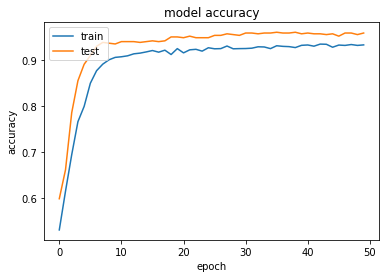

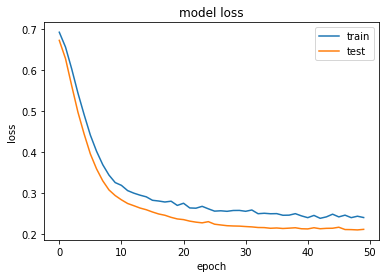

In [63]:
# Plot Model Loss and Model accuracy
print(history.history.keys()) 
# summarize history for accuracy 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) # RAISE ERROR 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show() 
# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) #RAISE ERROR 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

In [64]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [65]:
texts=dataTweet.text
tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(texts)
sequences_train = tokenizer.texts_to_sequences(dataTweet.text)

In [66]:
def analyseSentiment(data):
    twt = [data]
    #vectorizing the tweet by the pre-fitted tokenizer instance
    twt = tokenizer.texts_to_sequences(twt)
    #padding the tweet to have exactly the same shape as `embedding_2` input
    twt = pad_sequences(twt, maxlen=MAX_SEQUENCE_LENGTH, dtype='int32', value=0)
    sentiment = model.predict(twt,batch_size=1,verbose = 2)
    if(sentiment[0] < 0.5):
        return "Negative with "+ "{0:.2f}".format((1 - sentiment[0][0]) * 100)+ "% Confidence."
    else:
        return "Positive with "+"{0:.2f}".format(sentiment[0][0] * 100)+"% Confidence."

In [67]:
print(analyseSentiment("telkomsel jaringannya lambat sekali"))

Negative with 70.55% Confidence.


In [68]:
print(analyseSentiment("jaringannya jelek namun bagus dan cepat sekali membuat aku jatuh cinta"))

Positive with 98.68% Confidence.


In [70]:
print(analyseSentiment("kecepatan telkomsel memang terbaik dapat diandalkan"))

Positive with 99.78% Confidence.


In [71]:
import pickle

with open('telkomsel2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [72]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(1470, 1)


In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [74]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

In [75]:
y_pred

array([[0.00207477],
       [0.99784565],
       [0.47017223],
       ...,
       [0.9948496 ],
       [0.0185192 ],
       [0.46397293]], dtype=float32)

In [76]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

In [77]:
cm = confusion_matrix(y_test,y_pred.round())

In [78]:
cm

array([[823,  23],
       [  5, 619]])

In [79]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Akurasinya: 0.9809523809523809
Confusion matrix, without normalization
[[823  23]
 [  5 619]]


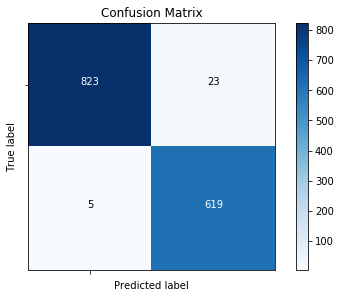

In [80]:
akur = accuracy_score(y_test, y_pred.round())
print("Akurasinya:", akur)
cm_plot_labels = ['']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [81]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test,y_pred.round())
print("Accuracy : ", accuracy_score(y_test,y_pred.round()))
print("Precision : ", precision_score(y_test,y_pred.round(), average = 'weighted'))
print("Recall : ", recall_score(y_test,y_pred.round(), average = 'weighted'))
print("F1-Score : ", f1_score(y_test,y_pred.round(), average = 'weighted'))
print('Report : ')
print(classification_report(y_test, y_pred.round()))

Accuracy :  0.9809523809523809
Precision :  0.9813171184768097
Recall :  0.9809523809523809
F1-Score :  0.980985384012444
Report : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       846
           1       0.96      0.99      0.98       624

    accuracy                           0.98      1470
   macro avg       0.98      0.98      0.98      1470
weighted avg       0.98      0.98      0.98      1470



In [84]:
print(analyseSentiment("Harga mahal dan kualitas buruk"))

Negative with 90.44% Confidence.


In [85]:
print(analyseSentiment("meskipun sering bermasalah tapi aku tetap cinta dengan telkomsel"))

Positive with 65.86% Confidence.


In [86]:
print(analyseSentiment("dari dulu sampai sekarang aku selalu memilih setia terhadap telkomsel"))

Positive with 99.68% Confidence.


In [87]:
print(analyseSentiment("mantap tiara juga pengguna telkomsel masa kamu engga"))

Positive with 98.95% Confidence.
